In [1]:
import pandas as pd
df = pd.read_csv('Book1.csv')
df

,drugbank_id,name,smiles
0,DB00006,Bivalirudin,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...
1,DB00007,Leuprolide,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...
2,DB00014,Goserelin,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...
3,DB00035,Desmopressin,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...
4,DB00050,Cetrorelix,CC(C)C[C@H](NC(=O)[C@@H](CCCNC(N)=O)NC(=O)[C@H...
...,...,...,...
8283,DB15685,Selpercatinib,COC1=NC=C(CN2C3CC2CN(C3)C2=CC=C(C=N2)C2=CC(OCC...
8284,DB15686,GS-441524,NC1=NC=NN2C1=CC=C2[C@@]1(O[C@H](CO)[C@@H](O)[C...
8285,DB15687,Tridecactide,CSCC[C@H](NC(=O)[C@H](CO)NC(=O)[C@H](CC1=CC=C(...
8286,DB15688,Vazegepant,CN1CCC(CC1)N1CCN(CC1)C(=O)[C@@H](CC1=CC2=C(NN=...


In [2]:
#pip install selfies

In [3]:
import selfies as sf
df['smiles']=df['smiles'].astype(str)
df = df.dropna()
df['smiles'][0]

'CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@H](CCC(O)=O)NC(=O)[C@H](CC1=CC=CC=C1)NC(=O)[C@H](CC(O)=O)NC(=O)CNC(=O)[C@H](CC(N)=O)NC(=O)CNC(=O)CNC(=O)CNC(=O)CNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=O)[C@@H]1CCCN1C(=O)[C@H](N)CC1=CC=CC=C1)C(=O)N1CCC[C@H]1C(=O)N[C@@H](CCC(O)=O)C(=O)N[C@@H](CCC(O)=O)C(=O)N[C@@H](CC1=CC=C(O)C=C1)C(=O)N[C@@H](CC(C)C)C(O)=O'

In [4]:
df['selfies']='Nan'
df   

,drugbank_id,name,smiles,selfies
0,DB00006,Bivalirudin,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,Nan
1,DB00007,Leuprolide,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...,Nan
2,DB00014,Goserelin,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,Nan
3,DB00035,Desmopressin,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,Nan
4,DB00050,Cetrorelix,CC(C)C[C@H](NC(=O)[C@@H](CCCNC(N)=O)NC(=O)[C@H...,Nan
...,...,...,...,...
8283,DB15685,Selpercatinib,COC1=NC=C(CN2C3CC2CN(C3)C2=CC=C(C=N2)C2=CC(OCC...,Nan
8284,DB15686,GS-441524,NC1=NC=NN2C1=CC=C2[C@@]1(O[C@H](CO)[C@@H](O)[C...,Nan
8285,DB15687,Tridecactide,CSCC[C@H](NC(=O)[C@H](CO)NC(=O)[C@H](CC1=CC=C(...,Nan
8286,DB15688,Vazegepant,CN1CCC(CC1)N1CCN(CC1)C(=O)[C@@H](CC1=CC2=C(NN=...,Nan


In [5]:
import numpy as np

In [6]:
for i in range(0,8288):
    try:
        df['selfies'][i]= sf.encoder(df['smiles'][i])
    except:
        df['selfies'][i]=np.nan

In [7]:
df = df.dropna().reset_index()
array=list(df['selfies'])

In [8]:
df['selfies']

0       [C][C][C@H1][Branch1][C][C][C@H1][Branch2][N][...
1       [C][C][N][C][=Branch1][C][=O][C@@H1][C][C][C][...
2       [C][C][Branch1][C][C][C][C@H1][Branch2][Branch...
3       [N][C][=Branch1][C][=O][C][C][C@@H1][N][C][=Br...
4       [C][C][Branch1][C][C][C][C@H1][Branch2][=Branc...
                              ...                        
8256    [C][O][C][=N][C][=C][Branch2][Branch1][=Branch...
8257    [N][C][=N][C][=N][N][C][Ring1][=Branch1][=C][C...
8258    [C][S][C][C][C@H1][Branch2][Ring2][#Branch2][N...
8259    [C][N][C][C][C][Branch1][Branch1][C][C][Ring1]...
8260    [H][C@@][C][C@@H1][Branch1][C][18F][C@H1][Bran...
Name: selfies, Length: 8261, dtype: object

In [9]:
for i in range(0,8260):
    array[i]=array[i].split('][')
    array[i][0]=array[i][0].replace('[', '')
    array[i][-1]=array[i][-1].replace(']', '')

In [10]:
array

[['C',
  'C',
  'C@H1',
  'Branch1',
  'C',
  'C',
  'C@H1',
  'Branch2',
  'N',
  'Ring1',
  'N',
  'C',
  '=Branch1',
  'C',
  '=O',
  'C@H1',
  'Branch1',
  'Branch2',
  'C',
  'C',
  'C',
  'Branch1',
  'C',
  'O',
  '=O',
  'N',
  'C',
  '=Branch1',
  'C',
  '=O',
  'C@H1',
  'Branch1',
  'Branch2',
  'C',
  'C',
  'C',
  'Branch1',
  'C',
  'O',
  '=O',
  'N',
  'C',
  '=Branch1',
  'C',
  '=O',
  'C@H1',
  'Branch1',
  '#Branch2',
  'C',
  'C',
  '=C',
  'C',
  '=C',
  'C',
  '=C',
  'Ring1',
  '=Branch1',
  'N',
  'C',
  '=Branch1',
  'C',
  '=O',
  'C@H1',
  'Branch1',
  '#Branch1',
  'C',
  'C',
  'Branch1',
  'C',
  'O',
  '=O',
  'N',
  'C',
  '=Branch1',
  'C',
  '=O',
  'C',
  'N',
  'C',
  '=Branch1',
  'C',
  '=O',
  'C@H1',
  'Branch1',
  '#Branch1',
  'C',
  'C',
  'Branch1',
  'C',
  'N',
  '=O',
  'N',
  'C',
  '=Branch1',
  'C',
  '=O',
  'C',
  'N',
  'C',
  '=Branch1',
  'C',
  '=O',
  'C',
  'N',
  'C',
  '=Branch1',
  'C',
  '=O',
  'C',
  'N',
  'C',
  '=Branc

In [11]:
df

,index,drugbank_id,name,smiles,selfies
0,0,DB00006,Bivalirudin,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,[C][C][C@H1][Branch1][C][C][C@H1][Branch2][N][...
1,1,DB00007,Leuprolide,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...,[C][C][N][C][=Branch1][C][=O][C@@H1][C][C][C][...
2,2,DB00014,Goserelin,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,[C][C][Branch1][C][C][C][C@H1][Branch2][Branch...
3,3,DB00035,Desmopressin,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,[N][C][=Branch1][C][=O][C][C][C@@H1][N][C][=Br...
4,4,DB00050,Cetrorelix,CC(C)C[C@H](NC(=O)[C@@H](CCCNC(N)=O)NC(=O)[C@H...,[C][C][Branch1][C][C][C][C@H1][Branch2][=Branc...
...,...,...,...,...,...
8256,8283,DB15685,Selpercatinib,COC1=NC=C(CN2C3CC2CN(C3)C2=CC=C(C=N2)C2=CC(OCC...,[C][O][C][=N][C][=C][Branch2][Branch1][=Branch...
8257,8284,DB15686,GS-441524,NC1=NC=NN2C1=CC=C2[C@@]1(O[C@H](CO)[C@@H](O)[C...,[N][C][=N][C][=N][N][C][Ring1][=Branch1][=C][C...
8258,8285,DB15687,Tridecactide,CSCC[C@H](NC(=O)[C@H](CO)NC(=O)[C@H](CC1=CC=C(...,[C][S][C][C][C@H1][Branch2][Ring2][#Branch2][N...
8259,8286,DB15688,Vazegepant,CN1CCC(CC1)N1CCN(CC1)C(=O)[C@@H](CC1=CC2=C(NN=...,[C][N][C][C][C][Branch1][Branch1][C][C][Ring1]...


In [12]:
drug_features=pd.read_csv('drug_property.csv')

In [13]:
drug_features

,drugbank_id,cas,logP ALOGPS,logP ChemAxon,solubility ALOGPS,pKa (strongest acidic),pKa (strongest basic)
0,DB00006,128270-60-0,-0.76,-14.00,4.64e-02 g/l,2.79,11.88
1,DB00007,53714-56-0,1.04,-2.40,3.38e-02 g/l,9.49,11.92
2,DB00014,65807-02-5,0.30,-5.20,2.83e-02 g/l,9.27,10.82
3,DB00035,16679-58-6,-1.00,-6.10,1.10e-01 g/l,9.50,11.77
4,DB00050,120287-85-6,1.33,-1.70,6.94e-03 g/l,9.50,11.79
...,...,...,...,...,...,...,...
8283,DB15685,2152628-33-4,3.03,3.14,2.99e-02 g/l,14.59,6.28
8284,DB15686,1191237-69-0,-0.58,-1.90,1.31e+01 g/l,12.13,0.65
8285,DB15687,22006-64-0,-2.40,-9.30,2.66e-02 g/l,3.17,11.91
8286,DB15688,1337918-83-8,2.85,2.14,6.96e-02 g/l,12.38,8.81


In [14]:
#merged_df.reset_index(drop = True, inplace = True)
#drug_property.reset_index(drop = True, inplace = True)
drug_bank = pd.merge(df,drug_features,on='drugbank_id',how='left')

In [15]:
drug_bank

,index,drugbank_id,name,smiles,selfies,cas,logP ALOGPS,logP ChemAxon,solubility ALOGPS,pKa (strongest acidic),pKa (strongest basic)
0,0,DB00006,Bivalirudin,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,[C][C][C@H1][Branch1][C][C][C@H1][Branch2][N][...,128270-60-0,-0.76,-14.00,4.64e-02 g/l,2.79,11.88
1,1,DB00007,Leuprolide,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...,[C][C][N][C][=Branch1][C][=O][C@@H1][C][C][C][...,53714-56-0,1.04,-2.40,3.38e-02 g/l,9.49,11.92
2,2,DB00014,Goserelin,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,[C][C][Branch1][C][C][C][C@H1][Branch2][Branch...,65807-02-5,0.30,-5.20,2.83e-02 g/l,9.27,10.82
3,3,DB00035,Desmopressin,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,[N][C][=Branch1][C][=O][C][C][C@@H1][N][C][=Br...,16679-58-6,-1.00,-6.10,1.10e-01 g/l,9.50,11.77
4,4,DB00050,Cetrorelix,CC(C)C[C@H](NC(=O)[C@@H](CCCNC(N)=O)NC(=O)[C@H...,[C][C][Branch1][C][C][C][C@H1][Branch2][=Branc...,120287-85-6,1.33,-1.70,6.94e-03 g/l,9.50,11.79
...,...,...,...,...,...,...,...,...,...,...,...
8256,8283,DB15685,Selpercatinib,COC1=NC=C(CN2C3CC2CN(C3)C2=CC=C(C=N2)C2=CC(OCC...,[C][O][C][=N][C][=C][Branch2][Branch1][=Branch...,2152628-33-4,3.03,3.14,2.99e-02 g/l,14.59,6.28
8257,8284,DB15686,GS-441524,NC1=NC=NN2C1=CC=C2[C@@]1(O[C@H](CO)[C@@H](O)[C...,[N][C][=N][C][=N][N][C][Ring1][=Branch1][=C][C...,1191237-69-0,-0.58,-1.90,1.31e+01 g/l,12.13,0.65
8258,8285,DB15687,Tridecactide,CSCC[C@H](NC(=O)[C@H](CO)NC(=O)[C@H](CC1=CC=C(...,[C][S][C][C][C@H1][Branch2][Ring2][#Branch2][N...,22006-64-0,-2.40,-9.30,2.66e-02 g/l,3.17,11.91
8259,8286,DB15688,Vazegepant,CN1CCC(CC1)N1CCN(CC1)C(=O)[C@@H](CC1=CC2=C(NN=...,[C][N][C][C][C][Branch1][Branch1][C][C][Ring1]...,1337918-83-8,2.85,2.14,6.96e-02 g/l,12.38,8.81


In [16]:
drug_bank.to_csv('drug_bank.csv')

In [17]:
drug_bank=pd.read_csv('drug_bank.csv')

In [18]:
drug_bank

,Unnamed: 0,index,drugbank_id,name,smiles,selfies,cas,logP ALOGPS,logP ChemAxon,solubility ALOGPS,pKa (strongest acidic),pKa (strongest basic)
0,0,0,DB00006,Bivalirudin,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,[C][C][C@H1][Branch1][C][C][C@H1][Branch2][N][...,128270-60-0,-0.76,-14.00,4.64e-02 g/l,2.79,11.88
1,1,1,DB00007,Leuprolide,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...,[C][C][N][C][=Branch1][C][=O][C@@H1][C][C][C][...,53714-56-0,1.04,-2.40,3.38e-02 g/l,9.49,11.92
2,2,2,DB00014,Goserelin,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,[C][C][Branch1][C][C][C][C@H1][Branch2][Branch...,65807-02-5,0.30,-5.20,2.83e-02 g/l,9.27,10.82
3,3,3,DB00035,Desmopressin,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,[N][C][=Branch1][C][=O][C][C][C@@H1][N][C][=Br...,16679-58-6,-1.00,-6.10,1.10e-01 g/l,9.50,11.77
4,4,4,DB00050,Cetrorelix,CC(C)C[C@H](NC(=O)[C@@H](CCCNC(N)=O)NC(=O)[C@H...,[C][C][Branch1][C][C][C][C@H1][Branch2][=Branc...,120287-85-6,1.33,-1.70,6.94e-03 g/l,9.50,11.79
...,...,...,...,...,...,...,...,...,...,...,...,...
8256,8256,8283,DB15685,Selpercatinib,COC1=NC=C(CN2C3CC2CN(C3)C2=CC=C(C=N2)C2=CC(OCC...,[C][O][C][=N][C][=C][Branch2][Branch1][=Branch...,2152628-33-4,3.03,3.14,2.99e-02 g/l,14.59,6.28
8257,8257,8284,DB15686,GS-441524,NC1=NC=NN2C1=CC=C2[C@@]1(O[C@H](CO)[C@@H](O)[C...,[N][C][=N][C][=N][N][C][Ring1][=Branch1][=C][C...,1191237-69-0,-0.58,-1.90,1.31e+01 g/l,12.13,0.65
8258,8258,8285,DB15687,Tridecactide,CSCC[C@H](NC(=O)[C@H](CO)NC(=O)[C@H](CC1=CC=C(...,[C][S][C][C][C@H1][Branch2][Ring2][#Branch2][N...,22006-64-0,-2.40,-9.30,2.66e-02 g/l,3.17,11.91
8259,8259,8286,DB15688,Vazegepant,CN1CCC(CC1)N1CCN(CC1)C(=O)[C@@H](CC1=CC2=C(NN=...,[C][N][C][C][C][Branch1][Branch1][C][C][Ring1]...,1337918-83-8,2.85,2.14,6.96e-02 g/l,12.38,8.81


In [19]:
drug_bank.drop('Unnamed: 0',axis=1)

,index,drugbank_id,name,smiles,selfies,cas,logP ALOGPS,logP ChemAxon,solubility ALOGPS,pKa (strongest acidic),pKa (strongest basic)
0,0,DB00006,Bivalirudin,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,[C][C][C@H1][Branch1][C][C][C@H1][Branch2][N][...,128270-60-0,-0.76,-14.00,4.64e-02 g/l,2.79,11.88
1,1,DB00007,Leuprolide,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...,[C][C][N][C][=Branch1][C][=O][C@@H1][C][C][C][...,53714-56-0,1.04,-2.40,3.38e-02 g/l,9.49,11.92
2,2,DB00014,Goserelin,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,[C][C][Branch1][C][C][C][C@H1][Branch2][Branch...,65807-02-5,0.30,-5.20,2.83e-02 g/l,9.27,10.82
3,3,DB00035,Desmopressin,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,[N][C][=Branch1][C][=O][C][C][C@@H1][N][C][=Br...,16679-58-6,-1.00,-6.10,1.10e-01 g/l,9.50,11.77
4,4,DB00050,Cetrorelix,CC(C)C[C@H](NC(=O)[C@@H](CCCNC(N)=O)NC(=O)[C@H...,[C][C][Branch1][C][C][C][C@H1][Branch2][=Branc...,120287-85-6,1.33,-1.70,6.94e-03 g/l,9.50,11.79
...,...,...,...,...,...,...,...,...,...,...,...
8256,8283,DB15685,Selpercatinib,COC1=NC=C(CN2C3CC2CN(C3)C2=CC=C(C=N2)C2=CC(OCC...,[C][O][C][=N][C][=C][Branch2][Branch1][=Branch...,2152628-33-4,3.03,3.14,2.99e-02 g/l,14.59,6.28
8257,8284,DB15686,GS-441524,NC1=NC=NN2C1=CC=C2[C@@]1(O[C@H](CO)[C@@H](O)[C...,[N][C][=N][C][=N][N][C][Ring1][=Branch1][=C][C...,1191237-69-0,-0.58,-1.90,1.31e+01 g/l,12.13,0.65
8258,8285,DB15687,Tridecactide,CSCC[C@H](NC(=O)[C@H](CO)NC(=O)[C@H](CC1=CC=C(...,[C][S][C][C][C@H1][Branch2][Ring2][#Branch2][N...,22006-64-0,-2.40,-9.30,2.66e-02 g/l,3.17,11.91
8259,8286,DB15688,Vazegepant,CN1CCC(CC1)N1CCN(CC1)C(=O)[C@@H](CC1=CC2=C(NN=...,[C][N][C][C][C][Branch1][Branch1][C][C][Ring1]...,1337918-83-8,2.85,2.14,6.96e-02 g/l,12.38,8.81


In [20]:
#pip install --upgrade numpy

In [21]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=array, vector_size=80, window=4, min_count=1, workers=4)
model.save("word2vec.model")

In [22]:
#pip install gensim

In [23]:
model.build_vocab(array)

In [24]:
vector=model.wv['C']
sims = model.wv.most_similar('C', topn=10)

In [25]:
word_vectors = model.wv

In [26]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [27]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(array)]
model = Doc2Vec(documents, vector_size=100, window=2, min_count=1, workers=4)

In [28]:
matrix=model.dv.get_normed_vectors()

In [29]:
df_dv=pd.DataFrame(matrix.tolist())

In [30]:
df_new = pd.concat([df, df_dv], axis=1)

In [31]:
df_dv

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.031520,-0.032506,-0.023595,0.046478,-0.107770,-0.102544,-0.086734,-0.109352,-0.012245,0.053754,...,0.100786,-0.035295,-0.104020,-0.038620,-0.121429,-0.151543,-0.273005,-0.012589,-0.031823,0.067283
1,-0.067221,-0.004743,-0.161917,0.017811,-0.078428,-0.067958,0.009953,-0.119897,0.021762,-0.022647,...,-0.003983,0.001898,-0.109577,0.089605,-0.029173,-0.217912,-0.123277,-0.106684,-0.050691,0.077896
2,0.021440,-0.093014,-0.037507,-0.126464,-0.052137,-0.026272,-0.041410,-0.196302,0.051310,0.023289,...,0.020584,-0.040213,-0.187566,0.011342,-0.091209,-0.199669,-0.083324,-0.093973,0.036197,0.015997
3,0.088821,-0.085526,-0.069743,0.015073,-0.082881,-0.056783,0.193228,-0.035014,-0.070922,-0.134221,...,-0.051662,0.001563,-0.148407,0.053329,0.078265,-0.050190,-0.029629,-0.138295,0.211384,-0.052271
4,-0.061337,-0.035072,-0.131854,-0.023102,-0.058605,-0.074742,-0.024384,-0.094880,0.004251,-0.039290,...,0.047910,-0.029246,-0.096714,-0.011600,-0.054005,-0.227829,-0.139206,-0.071596,-0.095512,0.104960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8256,0.115528,0.021567,-0.023302,0.043455,-0.092563,-0.025365,0.228812,0.089529,-0.133725,-0.111918,...,0.048833,0.065226,0.046123,0.109287,0.178201,0.062614,0.034546,-0.072662,0.181578,-0.045285
8257,-0.005725,-0.069547,-0.041246,-0.016844,-0.054187,-0.028769,0.192750,0.051137,-0.243174,-0.176942,...,-0.043314,0.005154,0.018333,0.095486,0.186041,0.103365,0.104223,-0.228545,0.192425,-0.066467
8258,0.017754,-0.000351,-0.073276,0.144131,-0.017835,-0.025496,-0.049634,-0.209334,-0.021848,-0.017615,...,0.019534,-0.051419,-0.123183,0.000377,-0.090158,-0.253553,-0.198332,-0.088842,-0.034240,0.049336
8259,0.134308,-0.054046,-0.067489,0.003624,0.023716,-0.037196,-0.016453,-0.088403,0.018591,0.067043,...,-0.057110,0.005566,-0.028427,0.000121,-0.037209,-0.123110,-0.127972,0.054154,0.169470,-0.118905


In [32]:
df_new.to_csv('drug_dv.csv')

In [33]:
df_new

,index,drugbank_id,name,smiles,selfies,0,1,2,3,4,...,90,91,92,93,94,95,96,97,98,99
0,0,DB00006,Bivalirudin,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,[C][C][C@H1][Branch1][C][C][C@H1][Branch2][N][...,0.031520,-0.032506,-0.023595,0.046478,-0.107770,...,0.100786,-0.035295,-0.104020,-0.038620,-0.121429,-0.151543,-0.273005,-0.012589,-0.031823,0.067283
1,1,DB00007,Leuprolide,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...,[C][C][N][C][=Branch1][C][=O][C@@H1][C][C][C][...,-0.067221,-0.004743,-0.161917,0.017811,-0.078428,...,-0.003983,0.001898,-0.109577,0.089605,-0.029173,-0.217912,-0.123277,-0.106684,-0.050691,0.077896
2,2,DB00014,Goserelin,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,[C][C][Branch1][C][C][C][C@H1][Branch2][Branch...,0.021440,-0.093014,-0.037507,-0.126464,-0.052137,...,0.020584,-0.040213,-0.187566,0.011342,-0.091209,-0.199669,-0.083324,-0.093973,0.036197,0.015997
3,3,DB00035,Desmopressin,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,[N][C][=Branch1][C][=O][C][C][C@@H1][N][C][=Br...,0.088821,-0.085526,-0.069743,0.015073,-0.082881,...,-0.051662,0.001563,-0.148407,0.053329,0.078265,-0.050190,-0.029629,-0.138295,0.211384,-0.052271
4,4,DB00050,Cetrorelix,CC(C)C[C@H](NC(=O)[C@@H](CCCNC(N)=O)NC(=O)[C@H...,[C][C][Branch1][C][C][C][C@H1][Branch2][=Branc...,-0.061337,-0.035072,-0.131854,-0.023102,-0.058605,...,0.047910,-0.029246,-0.096714,-0.011600,-0.054005,-0.227829,-0.139206,-0.071596,-0.095512,0.104960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8256,8283,DB15685,Selpercatinib,COC1=NC=C(CN2C3CC2CN(C3)C2=CC=C(C=N2)C2=CC(OCC...,[C][O][C][=N][C][=C][Branch2][Branch1][=Branch...,0.115528,0.021567,-0.023302,0.043455,-0.092563,...,0.048833,0.065226,0.046123,0.109287,0.178201,0.062614,0.034546,-0.072662,0.181578,-0.045285
8257,8284,DB15686,GS-441524,NC1=NC=NN2C1=CC=C2[C@@]1(O[C@H](CO)[C@@H](O)[C...,[N][C][=N][C][=N][N][C][Ring1][=Branch1][=C][C...,-0.005725,-0.069547,-0.041246,-0.016844,-0.054187,...,-0.043314,0.005154,0.018333,0.095486,0.186041,0.103365,0.104223,-0.228545,0.192425,-0.066467
8258,8285,DB15687,Tridecactide,CSCC[C@H](NC(=O)[C@H](CO)NC(=O)[C@H](CC1=CC=C(...,[C][S][C][C][C@H1][Branch2][Ring2][#Branch2][N...,0.017754,-0.000351,-0.073276,0.144131,-0.017835,...,0.019534,-0.051419,-0.123183,0.000377,-0.090158,-0.253553,-0.198332,-0.088842,-0.034240,0.049336
8259,8286,DB15688,Vazegepant,CN1CCC(CC1)N1CCN(CC1)C(=O)[C@@H](CC1=CC2=C(NN=...,[C][N][C][C][C][Branch1][Branch1][C][C][Ring1]...,0.134308,-0.054046,-0.067489,0.003624,0.023716,...,-0.057110,0.005566,-0.028427,0.000121,-0.037209,-0.123110,-0.127972,0.054154,0.169470,-0.118905


In [34]:
drug_data1= pd.read_csv('drug_bank1.csv')
columns_to_drop = ['cas',]
drug_data1 = drug_data1.drop(columns=columns_to_drop)
drug_data1.to_csv('drug_bank.csv')

In [35]:
drug_dv=pd.read_csv('drug_dv.csv')

In [36]:
drug_dv

,Unnamed: 0,index,drugbank_id,name,smiles,selfies,0,1,2,3,...,90,91,92,93,94,95,96,97,98,99
0,0,0,DB00006,Bivalirudin,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,[C][C][C@H1][Branch1][C][C][C@H1][Branch2][N][...,0.031520,-0.032506,-0.023595,0.046478,...,0.100786,-0.035295,-0.104020,-0.038620,-0.121429,-0.151543,-0.273005,-0.012589,-0.031823,0.067283
1,1,1,DB00007,Leuprolide,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...,[C][C][N][C][=Branch1][C][=O][C@@H1][C][C][C][...,-0.067221,-0.004743,-0.161917,0.017811,...,-0.003983,0.001898,-0.109577,0.089605,-0.029173,-0.217912,-0.123277,-0.106684,-0.050691,0.077896
2,2,2,DB00014,Goserelin,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,[C][C][Branch1][C][C][C][C@H1][Branch2][Branch...,0.021440,-0.093014,-0.037507,-0.126464,...,0.020584,-0.040213,-0.187566,0.011342,-0.091209,-0.199669,-0.083324,-0.093973,0.036197,0.015997
3,3,3,DB00035,Desmopressin,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,[N][C][=Branch1][C][=O][C][C][C@@H1][N][C][=Br...,0.088821,-0.085526,-0.069743,0.015073,...,-0.051662,0.001563,-0.148407,0.053329,0.078265,-0.050190,-0.029629,-0.138295,0.211384,-0.052271
4,4,4,DB00050,Cetrorelix,CC(C)C[C@H](NC(=O)[C@@H](CCCNC(N)=O)NC(=O)[C@H...,[C][C][Branch1][C][C][C][C@H1][Branch2][=Branc...,-0.061337,-0.035072,-0.131854,-0.023102,...,0.047910,-0.029246,-0.096714,-0.011600,-0.054005,-0.227829,-0.139206,-0.071596,-0.095512,0.104960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8256,8256,8283,DB15685,Selpercatinib,COC1=NC=C(CN2C3CC2CN(C3)C2=CC=C(C=N2)C2=CC(OCC...,[C][O][C][=N][C][=C][Branch2][Branch1][=Branch...,0.115528,0.021567,-0.023302,0.043455,...,0.048833,0.065226,0.046123,0.109287,0.178201,0.062614,0.034546,-0.072662,0.181578,-0.045285
8257,8257,8284,DB15686,GS-441524,NC1=NC=NN2C1=CC=C2[C@@]1(O[C@H](CO)[C@@H](O)[C...,[N][C][=N][C][=N][N][C][Ring1][=Branch1][=C][C...,-0.005725,-0.069547,-0.041246,-0.016844,...,-0.043314,0.005154,0.018333,0.095486,0.186041,0.103365,0.104223,-0.228545,0.192425,-0.066467
8258,8258,8285,DB15687,Tridecactide,CSCC[C@H](NC(=O)[C@H](CO)NC(=O)[C@H](CC1=CC=C(...,[C][S][C][C][C@H1][Branch2][Ring2][#Branch2][N...,0.017754,-0.000351,-0.073276,0.144131,...,0.019534,-0.051419,-0.123183,0.000377,-0.090158,-0.253553,-0.198332,-0.088842,-0.034240,0.049336
8259,8259,8286,DB15688,Vazegepant,CN1CCC(CC1)N1CCN(CC1)C(=O)[C@@H](CC1=CC2=C(NN=...,[C][N][C][C][C][Branch1][Branch1][C][C][Ring1]...,0.134308,-0.054046,-0.067489,0.003624,...,-0.057110,0.005566,-0.028427,0.000121,-0.037209,-0.123110,-0.127972,0.054154,0.169470,-0.118905


In [37]:
import pandas as pd
edge = pd.read_csv('mnop.csv')
node_features = pd.read_csv('node_features.csv')
node_features.index=node_features['drugbank_id']

In [38]:
edge.shape[0]

50178

In [39]:
missing_target=[]
for j in range(0,edge.shape[0]):
    if edge['target'][j] not in node_features.index:
        missing_target.append(j)
edge=edge.drop(index=missing_target)

In [40]:
edge=edge.reset_index().drop('index',axis=1)

In [41]:
edge

,source,target,interaction
0,DB00862,DB00966,1
1,DB00575,DB00806,1
2,DB01242,DB08893,1
3,DB01235,DB01275,1
4,DB00018,DB00333,1
...,...,...,...
33919,DB00632,DB15299,0
33920,DB00633,DB15300,0
33921,DB00634,DB15302,0
33922,DB00635,DB15307,0


In [42]:
missing_source=[]
for i in range(0,edge.shape[0]):
    if edge['source'][i] not in node_features.index:
        missing_source.append(i)
edge=edge.drop(index=missing_source)

In [43]:
edge=edge.reset_index().drop('index',axis=1)

In [44]:
edge

,source,target,interaction
0,DB00862,DB00966,1
1,DB01235,DB01275,1
2,DB01609,DB06212,1
3,DB01232,DB09291,1
4,DB00104,DB00908,1
...,...,...,...
22967,DB00632,DB15299,0
22968,DB00633,DB15300,0
22969,DB00634,DB15302,0
22970,DB00635,DB15307,0


In [45]:
edge['target'][100]

'DB04924'

In [46]:
edge

,source,target,interaction
0,DB00862,DB00966,1
1,DB01235,DB01275,1
2,DB01609,DB06212,1
3,DB01232,DB09291,1
4,DB00104,DB00908,1
...,...,...,...
22967,DB00632,DB15299,0
22968,DB00633,DB15300,0
22969,DB00634,DB15302,0
22970,DB00635,DB15307,0


In [47]:
edge.to_csv("DDI1.csv")

In [48]:
Dd= pd.read_csv("DDI1.csv")
Dd

,Unnamed: 0,source,target,interaction
0,0,DB00862,DB00966,1
1,1,DB01235,DB01275,1
2,2,DB01609,DB06212,1
3,3,DB01232,DB09291,1
4,4,DB00104,DB00908,1
...,...,...,...,...
22967,22967,DB00632,DB15299,0
22968,22968,DB00633,DB15300,0
22969,22969,DB00634,DB15302,0
22970,22970,DB00635,DB15307,0


In [49]:
node_features

,drugbank_id,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
drugbank_id,,,,,,,,,,,,,,,,,,,,,
DB00006,DB00006,0.059036,0.035191,-0.097727,0.014895,-0.022372,-0.056896,-0.104624,-0.188619,0.028703,...,0.088658,-0.065509,-0.035731,0.085919,-0.170598,-0.175159,-0.191762,0.065074,-0.186361,0.119784
DB00007,DB00007,0.027394,-0.003046,-0.103302,-0.079478,-0.077194,0.002059,0.073160,-0.040545,-0.038603,...,0.028882,0.018922,0.055737,0.070286,0.044280,-0.047593,-0.049820,-0.111029,-0.078730,0.106729
DB00014,DB00014,-0.019588,-0.007456,-0.072344,-0.123798,-0.023545,-0.060856,0.042265,-0.147993,-0.035053,...,0.031748,-0.056336,-0.063943,0.064091,-0.049200,-0.087483,-0.146446,-0.087865,-0.068639,-0.002104
DB00035,DB00035,0.003780,0.030965,-0.101901,-0.029893,-0.059107,-0.102086,0.068377,-0.093131,-0.026475,...,0.061381,0.015951,-0.099836,0.100820,-0.032667,-0.111350,-0.203808,-0.019557,-0.104347,0.003208
DB00050,DB00050,-0.033895,-0.035411,-0.162756,-0.104595,0.002374,-0.027808,0.051860,-0.104956,0.059240,...,0.000299,-0.018004,0.004947,-0.006487,-0.032944,-0.152478,-0.159546,0.030112,-0.116974,0.043553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DB15685,DB15685,0.163365,-0.045105,0.006035,0.019042,-0.089067,0.048256,0.103582,0.073999,-0.021704,...,0.067538,0.072654,0.122794,0.072291,0.162037,0.119889,0.041298,-0.007357,0.133502,0.091923
DB15686,DB15686,-0.031627,-0.097192,-0.038505,-0.017085,-0.114686,-0.063824,0.160650,0.129845,-0.269547,...,0.008733,0.055895,0.019710,0.098794,0.155673,0.092811,0.112296,-0.212770,0.151390,0.046452
DB15687,DB15687,0.059058,0.016577,-0.105138,-0.084817,-0.010719,0.021279,-0.017214,-0.236663,0.063636,...,0.011917,-0.071063,-0.047694,0.077615,-0.100889,-0.122573,-0.140162,-0.069846,-0.081516,-0.028342


In [50]:
pip install networkx


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
#! pip uninstall spektral
#! pip install spektral


RANDOM FOREST

In [78]:
import pandas as pd

# Load DDI data
ddi_ = pd.read_csv('DDI1.csv')
ddi_['indice'] = range(1, len(ddi_) + 1)
ddi_.to_csv('D-D-I_file.csv', index=False)


#Show data
ddi_data = pd.read_csv('D-D-I_file.csv')
ddi_data


# Load drug data
drug_data = pd.read_csv('drug_bank.csv')


# Merge DDI data with drug data
merged_data_0 = pd.merge(ddi_data, drug_data, left_on=['source'], right_on='drugbank_id', how='inner')
merged_data_1= pd.merge(ddi_data, drug_data, left_on='target', right_on='drugbank_id', how='inner')
merged_data_0= merged_data_0.rename(columns={"name": "source_name","cas": "source_cas", "logP ALOGPS": "source_logP","logP ChemAxon": "source_logP_CA","pKa (strongest acidic)":"source_acidic_pKa","pKa (strongest basic)":"source_basic_pKa","solubility ALOGPS": "source_solubility",})
merged_data_1= merged_data_1.rename(columns={"name": "target_name","cas": "target_cas", "logP ALOGPS": "target_logP","logP ChemAxon": "target_logP_CA","pKa (strongest acidic)":"target_acidic_pKa","pKa (strongest basic)":"target_basic_pKa","solubility ALOGPS": "target_solubility",})






In [79]:
merged_data_0.to_csv("src.file")
source= pd.read_csv('src.file')
source


,Unnamed: 0,Unnamed: 0_x,source,target,interaction,indice,Unnamed: 0.1,Unnamed: 0_y,index,drugbank_id,source_name,smiles,selfies,source_logP,source_logP_CA,source_solubility,source_acidic_pKa,source_basic_pKa
0,0,0,DB00862,DB00966,1,1,555,555,555,DB00862,Vardenafil,CCCC1=NC(C)=C2N1NC(=NC2=O)C1=C(OCC)C=CC(=C1)S(...,[C][C][C][C][=N][C][Branch1][C][C][=C][N][Ring...,2.18,1.33,3.25e-01 g/l,8.01,6.21
1,1,293,DB00862,DB01359,1,294,555,555,555,DB00862,Vardenafil,CCCC1=NC(C)=C2N1NC(=NC2=O)C1=C(OCC)C=CC(=C1)S(...,[C][C][C][C][=N][C][Branch1][C][C][=C][N][Ring...,2.18,1.33,3.25e-01 g/l,8.01,6.21
2,2,355,DB00862,DB09063,1,356,555,555,555,DB00862,Vardenafil,CCCC1=NC(C)=C2N1NC(=NC2=O)C1=C(OCC)C=CC(=C1)S(...,[C][C][C][C][=N][C][Branch1][C][C][=C][N][Ring...,2.18,1.33,3.25e-01 g/l,8.01,6.21
3,3,431,DB00862,DB01023,1,432,555,555,555,DB00862,Vardenafil,CCCC1=NC(C)=C2N1NC(=NC2=O)C1=C(OCC)C=CC(=C1)S(...,[C][C][C][C][=N][C][Branch1][C][C][=C][N][Ring...,2.18,1.33,3.25e-01 g/l,8.01,6.21
4,4,486,DB00862,DB06414,1,487,555,555,555,DB00862,Vardenafil,CCCC1=NC(C)=C2N1NC(=NC2=O)C1=C(OCC)C=CC(=C1)S(...,[C][C][C][C][=N][C][Branch1][C][C][=C][N][Ring...,2.18,1.33,3.25e-01 g/l,8.01,6.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22967,22967,22939,DB00597,DB15250,0,22940,367,367,367,DB00597,Gadoteridol,[Gd+3].CC(O)CN1CCN(CC([O-])=O)CCN(CC([O-])=O)C...,[Gd+3].[C][C][Branch1][C][O][C][N][C][C][N][Br...,0.36,-7.50,1.12e+01 g/l,0.76,10.00
22968,22968,22942,DB00600,DB15256,0,22943,370,370,370,DB00600,Monobenzone,OC1=CC=C(OCC2=CC=CC=C2)C=C1,[O][C][=C][C][=C][Branch1][O][O][C][C][=C][C][...,3.08,3.24,3.92e-02 g/l,9.91,-4.80
22969,22969,22955,DB00616,DB15284,0,22956,383,383,383,DB00616,Candoxatril,COCCOC[C@H](CC1(CCCC1)C(=O)N[C@H]1CC[C@H](CC1)...,[C][O][C][C][O][C][C@H1][Branch2][Ring1][#C][C...,3.55,4.68,2.25e-03 g/l,4.29,1.32
22970,22970,22967,DB00632,DB15299,0,22968,395,395,395,DB00632,Docosanol,CCCCCCCCCCCCCCCCCCCCCCO,[C][C][C][C][C][C][C][C][C][C][C][C][C][C][C][...,9.31,8.81,1.96e-05 g/l,16.84,-2.00


In [80]:
merged_data_1.to_csv("target.file")
target= pd.read_csv('target.file')
target

,Unnamed: 0,Unnamed: 0_x,source,target,interaction,indice,Unnamed: 0.1,Unnamed: 0_y,index,drugbank_id,target_name,smiles,selfies,target_logP,target_logP_CA,target_solubility,target_acidic_pKa,target_basic_pKa
0,0,0,DB00862,DB00966,1,1,632,632,632,DB00966,Telmisartan,CCCC1=NC2=C(C=C(C=C2C)C2=NC3=CC=CC=C3N2C)N1CC1...,[C][C][C][C][=N][C][=C][Branch2][Ring1][Branch...,6.66,6.04,3.50e-03 g/l,3.65,6.1300
1,1,2574,DB00374,DB00966,1,2575,632,632,632,DB00966,Telmisartan,CCCC1=NC2=C(C=C(C=C2C)C2=NC3=CC=CC=C3N2C)N1CC1...,[C][C][C][C][=N][C][=C][Branch2][Ring1][Branch...,6.66,6.04,3.50e-03 g/l,3.65,6.1300
2,2,3390,DB00790,DB00966,1,3391,632,632,632,DB00966,Telmisartan,CCCC1=NC2=C(C=C(C=C2C)C2=NC3=CC=CC=C3N2C)N1CC1...,[C][C][C][C][=N][C][=C][Branch2][Ring1][Branch...,6.66,6.04,3.50e-03 g/l,3.65,6.1300
3,3,4567,DB00794,DB00966,1,4568,632,632,632,DB00966,Telmisartan,CCCC1=NC2=C(C=C(C=C2C)C2=NC3=CC=CC=C3N2C)N1CC1...,[C][C][C][C][=N][C][=C][Branch2][Ring1][Branch...,6.66,6.04,3.50e-03 g/l,3.65,6.1300
4,4,6449,DB00384,DB00966,1,6450,632,632,632,DB00966,Telmisartan,CCCC1=NC2=C(C=C(C=C2C)C2=NC3=CC=CC=C3N2C)N1CC1...,[C][C][C][C][=N][C][=C][Branch2][Ring1][Branch...,6.66,6.04,3.50e-03 g/l,3.65,6.1300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22967,22967,22967,DB00632,DB15299,0,22968,8095,8095,8122,DB15299,AMG-232,CC(C)[C@@H](CS(=O)(=O)C(C)C)N1[C@@H]([C@H](C[C...,[C][C][Branch1][C][C][C@@H1][Branch1][=C][C][S...,4.27,5.86,2.74e-04 g/l,4.19,-0.0047
22968,22968,22968,DB00633,DB15300,0,22969,8096,8096,8123,DB15300,Hydroquinidine,CC[C@H]1C[N@@]2CC[C@H]1C[C@@H]2[C@@H](O)C1=C2C...,[C][C][C@H1][C][N@@][C][C][C@H1][Ring1][=Branc...,3.36,2.82,3.12e-01 g/l,13.89,9.1800
22969,22969,22969,DB00634,DB15302,0,22970,8097,8097,8124,DB15302,2-fluorofucose,C[C@H](O)[C@@H](O)[C@@H](O)[C@H](F)C=O,[C][C@H1][Branch1][C][O][C@@H1][Branch1][C][O]...,-0.97,-1.60,1.15e+02 g/l,12.31,-3.0000
22970,22970,22970,DB00635,DB15307,0,22971,8098,8098,8125,DB15307,Atabecestat,C[C@]1(C=CSC(N)=N1)C1=CC(NC(=O)C2=NC=C(C=C2)C#...,[C][C@][Branch1][O][C][=C][S][C][Branch1][C][N...,2.48,2.70,1.70e-02 g/l,13.92,7.1300


In [84]:
merged_data = pd.merge(source, target, left_on=['source','target'], right_on=['source','target'], how='inner')
merged_data
merged_data.to_csv('merged_data.csv', index=False)


In [85]:
merged_data['source_solubility'] = merged_data['source_solubility'].astype(str)
merged_data['source_solubility'] = merged_data['source_solubility'].str.extract(r'([-+]?\d*\.\d+|\d+)').astype(float)


merged_data['target_solubility'] = merged_data['target_solubility'].astype(str)
merged_data['target_solubility'] = merged_data['target_solubility'].str.extract(r'([-+]?\d*\.\d+|\d+)').astype(float)

X = merged_data[['source_logP', 'source_logP_CA',"source_acidic_pKa","source_basic_pKa",'target_logP', 'target_logP_CA',"target_acidic_pKa","target_basic_pKa","source_solubility",'target_solubility']]  # Include relevant features
y = merged_data['interaction_x'] 


# Split data into training and testing sets
from sklearn.model_selection import train_test_split



# Split your data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train a Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9558503697259678


In [58]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate F1 score, precision, and recall
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the results
print(f' Random Forest Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

 Random Forest Accuracy: 0.9541104828186168
F1 Score: 0.975871926815323
Precision: 0.954586129753915
Recall: 0.9981286549707602


In [59]:
# Test on a single sample
single_sample = X_test.iloc[0].values.reshape(1, -1)
single_sample_prediction = clf.predict(single_sample)
actual_label = y_test.iloc[0]

print(f"Predicted Label for the Single Sample: {single_sample_prediction[0]}")
print(f"Actual Label for the Single Sample: {actual_label}")

Predicted Label for the Single Sample: 1
Actual Label for the Single Sample: 1


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [60]:
'''
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Interacting', 'Interacting'], yticklabels=['Not Interacting', 'Interacting'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
'''

'\nfrom sklearn.metrics import confusion_matrix\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# Generate the confusion matrix\ncm = confusion_matrix(y_test, y_pred)\n\n# Create a heatmap of the confusion matrix\nplt.figure(figsize=(8, 6))\nsns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[\'Not Interacting\', \'Interacting\'], yticklabels=[\'Not Interacting\', \'Interacting\'])\nplt.xlabel(\'Predicted\')\nplt.ylabel(\'True\')\nplt.title(\'Confusion Matrix\')\nplt.show()\n'

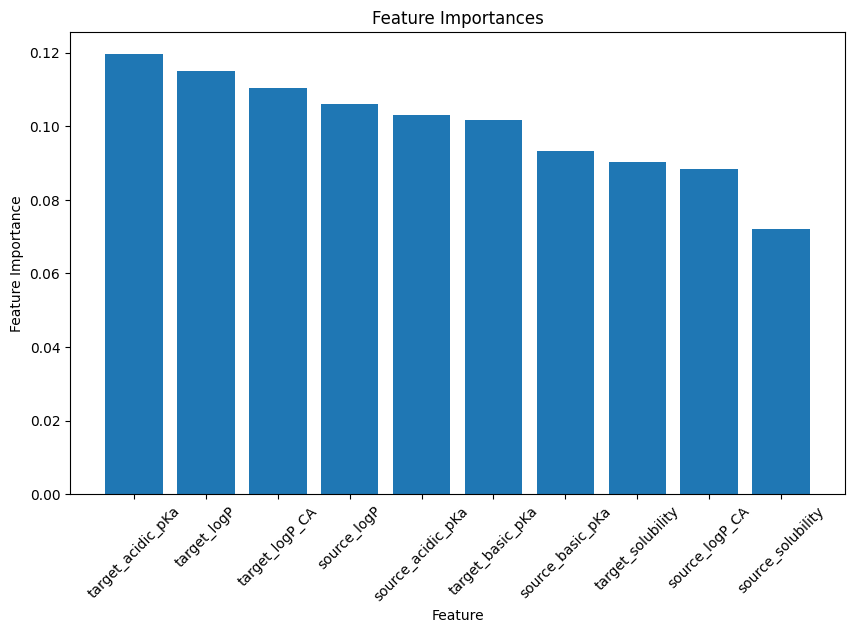

In [61]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
importances = clf.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importances')
plt.show()

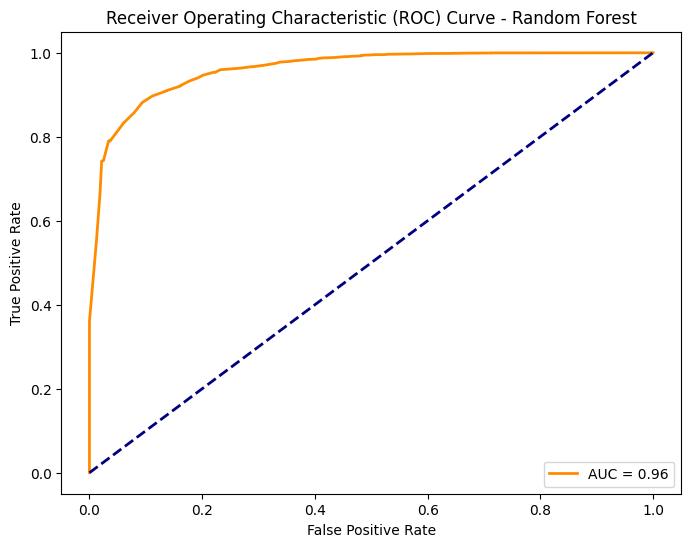

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC
y_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Create the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming you have a regression model, initialize it (replace RandomForestRegressor with your actual model)
regressor = RandomForestRegressor()

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Print the results
print(f'Mean Squared Error random Forest: {mse}')


Mean Squared Error random Forest: 0.03311182966397858


In [97]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load DDI data
ddi_data = pd.read_csv('merged_data.csv')


# Create a RandomForest model
X = ddi_data[['source_logP', 'source_logP_CA', 'source_acidic_pKa', 'source_basic_pKa', 'target_logP', 'target_logP_CA', 'target_acidic_pKa', 'target_basic_pKa']]
y = ddi_data['interaction_x']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Create a dictionary to map DrugBank IDs to drug names
drugbank_mapping = dict(zip(ddi_data['source'], ddi_data['source_name']))
drugbank_mapping.update(dict(zip(ddi_data['target'], ddi_data['target_name'])))

# Create a simple function to check interaction using the trained model
def check_interaction():
    source_drug_id = source_entry.get().strip()
    target_drug_id = target_entry.get().strip()

    # Get drug names based on DrugBank IDs
    source_drug_name = drugbank_mapping.get(source_drug_id, 'Not Found')
    target_drug_name = drugbank_mapping.get(target_drug_id, 'Not Found')

    # Display drug names
    source_name_label.config(text=f'Source Drug Name: {source_drug_name}')
    target_name_label.config(text=f'Target Drug Name: {target_drug_name}')

    # Prepare input features for prediction
    input_data = ddi_data[(ddi_data['source'] == source_drug_id) & (ddi_data['target'] == target_drug_id)][['source_logP', 'source_logP_CA', 'source_acidic_pKa', 'source_basic_pKa', 'target_logP', 'target_logP_CA', 'target_acidic_pKa', 'target_basic_pKa']]

    if not input_data.empty:
        # Make predictions
        interaction = clf.predict(input_data)

        # Display the result
        result_label.config(text=f'Interaction: {interaction[0]}')
    else:
        result_label.config(text='Interaction: Not Found')

# Create the main GUI window
window = tk.Tk()
window.title('Drug Interaction Checker with RandomForest')

# Create and place input widgets
source_label = ttk.Label(window, text='Source Drug (DrugBank ID):')
source_label.grid(row=0, column=0, padx=10, pady=10, sticky=tk.W)

source_entry = ttk.Entry(window)
source_entry.grid(row=0, column=1, padx=10, pady=10)

# Create a label to display the source drug name
source_name_label = ttk.Label(window, text='Source Drug Name: ')
source_name_label.grid(row=0, column=2, padx=10, pady=10, sticky=tk.W)

target_label = ttk.Label(window, text='Target Drug (DrugBank ID):')
target_label.grid(row=1, column=0, padx=10, pady=10, sticky=tk.W)

target_entry = ttk.Entry(window)
target_entry.grid(row=1, column=1, padx=10, pady=10)

# Create a label to display the target drug name
target_name_label = ttk.Label(window, text='Target Drug Name: ')
target_name_label.grid(row=1, column=2, padx=10, pady=10, sticky=tk.W)

# Create and place a button to check interaction
check_button = ttk.Button(window, text='Check Interaction', command=check_interaction)
check_button.grid(row=2, column=0, columnspan=3, pady=10)

# Create and place a label to display the result
result_label = ttk.Label(window, text='Interaction: ')
result_label.grid(row=3, column=0, columnspan=3, pady=10)

# Run the GUI
window.mainloop()


Feed Forward Neural Network


In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build a neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
_, training_accuracy = model.evaluate(X_train, y_train)
_, testing_accuracy = model.evaluate(X_test, y_test)

print(f'Training Accuracy: {training_accuracy}')
print(f'Testing Accuracy: {testing_accuracy}')

Epoch 1/10
575/575 [==============================] - 4s 4ms/step - loss: 0.2492 - accuracy: 0.9226 - val_loss: 0.2442 - val_accuracy: 0.9337
Epoch 2/10
575/575 [==============================] - 2s 4ms/step - loss: 0.2288 - accuracy: 0.9305 - val_loss: 0.2285 - val_accuracy: 0.9311
Epoch 3/10
575/575 [==============================] - 2s 4ms/step - loss: 0.2227 - accuracy: 0.9319 - val_loss: 0.2246 - val_accuracy: 0.9354
Epoch 4/10
575/575 [==============================] - 2s 3ms/step - loss: 0.2181 - accuracy: 0.9340 - val_loss: 0.2195 - val_accuracy: 0.9358
Epoch 5/10
575/575 [==============================] - 1s 2ms/step - loss: 0.2153 - accuracy: 0.9347 - val_loss: 0.2171 - val_accuracy: 0.9385
Epoch 6/10
575/575 [==============================] - 1s 2ms/step - loss: 0.2120 - accuracy: 0.9366 - val_loss: 0.2156 - val_accuracy: 0.9374
Epoch 7/10
575/575 [==============================] - 1s 2ms/step - loss: 0.2087 - accuracy: 0.9384 - val_loss: 0.2180 - val_accuracy: 0.9376
Epoch 

SVM

In [64]:
from sklearn.svm import SVC

# Train an SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm}')



#####
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train an SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Predict on the training and testing sets
y_pred_svm_train = svm.predict(X_train)
y_pred_svm_test = svm.predict(X_test)

# Calculate training and testing accuracy
accuracy_svm_train = accuracy_score(y_train, y_pred_svm_train)
accuracy_svm_test = accuracy_score(y_test, y_pred_svm_test)

print(f'SVM Training Accuracy: {accuracy_svm_train}')
print(f'SVM Testing Accuracy: {accuracy_svm_test}')



SVM Accuracy: 0.9332318399304045
SVM Training Accuracy: 0.9303350010876659
SVM Testing Accuracy: 0.9332318399304045


In [65]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score

# Predict on the test set
y_pred_svm = svm.predict(X_test)

# Calculate Recall
recall = recall_score(y_test, y_pred_svm)

# Calculate F1 Score
f1 = f1_score(y_test, y_pred_svm)

# Calculate Precision
precision = precision_score(y_test, y_pred_svm)

# Calculate AUC (Area Under the ROC Curve)
y_prob_svm = svm.decision_function(X_test)  # For SVM, we get decision function scores
auc = roc_auc_score(y_test, y_prob_svm)

# Print the results
print(f'SVM Accuracy: {accuracy_svm}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'AUC: {auc}')


SVM Accuracy: 0.9332318399304045
Recall: 0.9997660818713451
F1 Score: 0.965330321852061
Precision: 0.9331877729257642
AUC: 0.6680296199735666


In [98]:
from sklearn.metrics import mean_squared_error

# Assuming y_test and y_pred_svm are your actual and predicted values for the test set
mse_svm = mean_squared_error(y_test, y_pred_svm)
print(f'SVM Mean Squared Error: {mse_svm}')

# Similarly, for training set
mse_svm_train = mean_squared_error(y_train, y_pred_svm_train)
print(f'SVM Training Mean Squared Error: {mse_svm_train}')



SVM Mean Squared Error: 0.06676816006959548
SVM Training Mean Squared Error: 0.06966499891233413


AUC: 0.6680296199735666


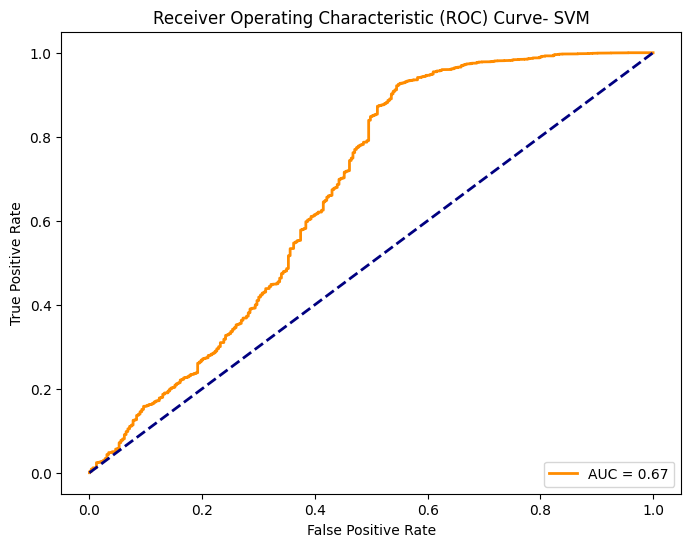

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate AUC (Area Under the ROC Curve)
y_prob_svm = svm.decision_function(X_test)  # For SVM, we get decision function scores
auc = roc_auc_score(y_test, y_prob_svm)
print(f'AUC: {auc}')

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)

# Create the ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve- SVM')
plt.legend(loc='lower right')
plt.show()


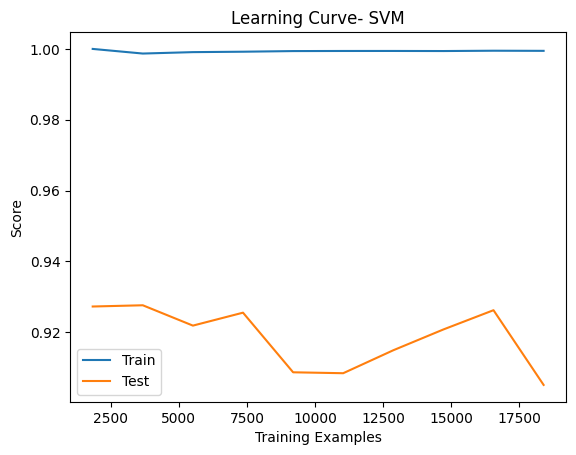

In [69]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(clf, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve- SVM')
plt.legend()
plt.show()

In [105]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load DDI data
ddi_data = pd.read_csv('merged_data.csv')

# Create an XGBoost model
X = ddi_data[['source_logP', 'source_logP_CA', 'source_acidic_pKa', 'source_basic_pKa', 'target_logP', 'target_logP_CA', 'target_acidic_pKa', 'target_basic_pKa']]
y = ddi_data['interaction_x']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = XGBClassifier()
clf.fit(X_train, y_train)

# Create a dictionary to map DrugBank IDs to drug names
drugbank_mapping = dict(zip(ddi_data['source'], ddi_data['source_name']))
drugbank_mapping.update(dict(zip(ddi_data['target'], ddi_data['target_name'])))

# Create a simple function to check interaction using the trained model
def check_interaction():
    source_drug_id = source_entry.get().strip()
    target_drug_id = target_entry.get().strip()

    # Get drug names based on DrugBank IDs
    source_drug_name = drugbank_mapping.get(source_drug_id, 'Not Found')
    target_drug_name = drugbank_mapping.get(target_drug_id, 'Not Found')

    # Display drug names
    source_name_label.config(text=f'Source Drug Name: {source_drug_name}')
    target_name_label.config(text=f'Target Drug Name: {target_drug_name}')

    # Prepare input features for prediction
    input_data = ddi_data[(ddi_data['source'] == source_drug_id) & (ddi_data['target'] == target_drug_id)][['source_logP', 'source_logP_CA', 'source_acidic_pKa', 'source_basic_pKa', 'target_logP', 'target_logP_CA', 'target_acidic_pKa', 'target_basic_pKa']]

    if not input_data.empty:
        # Make predictions
        interaction_prob = clf.predict_proba(input_data)[:, 1]
        interaction = 1 if interaction_prob > 0.5 else 0

        # Display the result
        result_label.config(text=f'Interaction Probability: {interaction_prob[0]:.4f}, Interaction: {interaction}')
    else:
        result_label.config(text='Interaction: Not Found')

# Create the main GUI window
window = tk.Tk()
window.title('Drug Interaction Checker with XGBoost')

# ... (Rest of the GUI code remains the same)

# Run the GUI
window.mainloop()


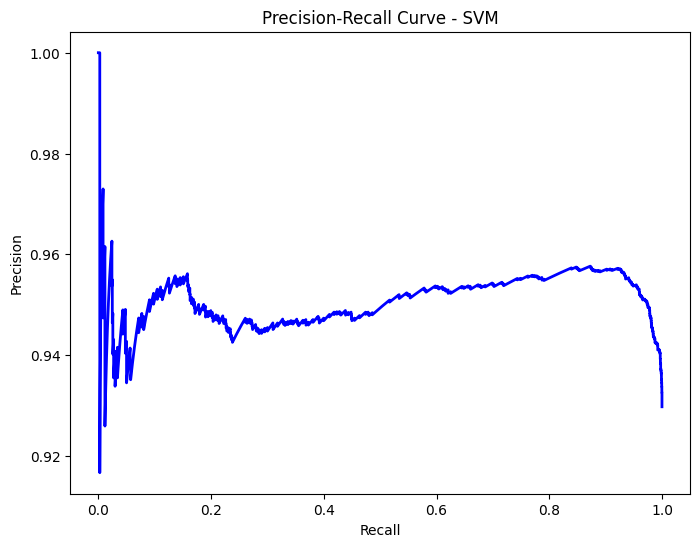

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_prob_svm)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - SVM')
plt.show()


In [ ]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(clf, X_test, y_test, n_repeats=30, random_state=0)

for i in perm_importance.importances_mean.argsort()[::-1]:
    if perm_importance.importances_mean[i] - 2 * perm_importance.importances_std[i] > 0:
        print(f'{feature_names[i]}: {perm_importance.importances_mean[i]:.3f}')


target_acidic_pKa: 0.027
target_logP: 0.023
source_acidic_pKa: 0.018
source_logP: 0.014
target_logP_CA: 0.010
target_basic_pKa: 0.008
source_basic_pKa: 0.007
source_logP_CA: 0.007
target_solubility: 0.002


GRADIENT BOOST

In [ ]:
#pip install xgboost

In [ ]:
from xgboost import XGBClassifier

# Train an XGBoost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb}')



XGBoost Accuracy: 0.957155284906481


In [99]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Train an XGBoost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb.predict(X_test)

# Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb}')

# Precision
precision = precision_score(y_test, y_pred_xgb)
print(f'Precision: {precision}')

# Recall
recall = recall_score(y_test, y_pred_xgb)
print(f'Recall: {recall}')

# F1 Score
f1 = f1_score(y_test, y_pred_xgb)
print(f'F1 Score: {f1}')

# Calculate Mean Squared Error
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'XGBoost Mean Squared Error: {mse_xgb}')

XGBoost Accuracy: 0.9584602000869944
Precision: 0.9599099099099099
Recall: 0.9969590643274854
F1 Score: 0.9780837636259322
XGBoost Mean Squared Error: 0.04153979991300565


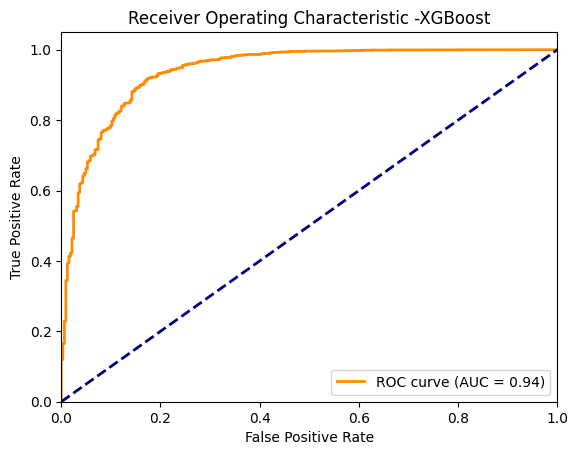

In [ ]:
# ROC AUC Curve
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]  # Probability of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_xgb)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic -XGBoost')
plt.legend(loc='lower right')
plt.show()


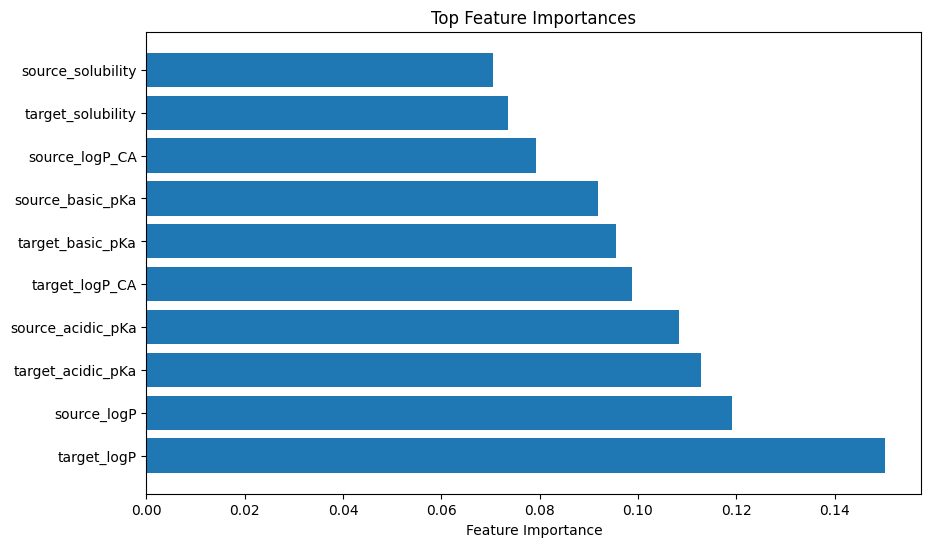

In [ ]:
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Train an XGBoost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Extract feature importances
feature_importance = xgb.feature_importances_

# Map feature importance scores to corresponding feature names
feature_names = X_train.columns  # Assuming X_train is a DataFrame
feature_importance_map = dict(zip(feature_names, feature_importance))

# Sort the features by their importance scores
sorted_features = sorted(feature_importance_map.items(), key=lambda x: x[1], reverse=True)

# Plotting feature importance
top_features = 10  # Change this value to display the top N important features

plt.figure(figsize=(10, 6))
features, importance = zip(*sorted_features[:top_features])
plt.barh(range(len(importance[:top_features])), importance[:top_features], align='center')
plt.yticks(range(len(features[:top_features])), features[:top_features])
plt.xlabel('Feature Importance')
plt.title('Top Feature Importances')
plt.show()


In [ ]:
import random

# Get the number of rows in X_test
num_samples = X_test.shape[0]

# Randomly select one index from X_test
random_index = random.randint(0, num_samples - 1)

# Get the random sample from X_test
random_sample = X_test.iloc[random_index]

# Make predictions for the random sample
sample_prediction = xgb.predict([random_sample])  # 'xgb' is your trained XGBoost model

# Display the prediction for the random sample
print(f"Prediction for the random sample: {sample_prediction}")


Prediction for the random sample: [1]


In [ ]:
from sklearn.feature_selection import RFE

rfe = RFE(clf, n_features_to_select=1)
rfe.fit(X, y)

ranking = rfe.ranking_
print(ranking)

[ 4  9  3  8  5  2  1  6 10  7]


In [101]:
'''You can use autoencoders for feature extraction and dimensionality reduction, and then apply a classifier on top of the encoded features. Here's a modified code that uses an autoencoder for feature extraction followed by a simple neural network classifier:'''

import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split

class GradientBoostingClassifier:
    def __init__(self, n_estimators=100, learning_rate=0.1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.models = []

    def fit(self, X, y):
        y_pred = np.zeros(y.shape)
        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressor(max_depth=3)
            tree.fit(X, residuals)
            update = self.learning_rate * tree.predict(X)
            y_pred += update
            self.models.append(tree)
            
    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for tree in self.models:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred

# Train an XGBoost-like model
xgb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb.predict(X_test)

# Combine predictions with encoded features
encoded_dim = 32  # Adjust the dimension based on your problem
encoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(encoded_dim, activation='relu'),
])
decoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(encoded_dim,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(X_train.shape[1], activation='sigmoid'),
])
autoencoder = tf.keras.Sequential([encoder, decoder])
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Fit the autoencoder on the training data
autoencoder.fit(X_train, X_train, epochs=20, batch_size=64, validation_split=0.1, verbose=2)

# Encode the features
encoded_features = encoder.predict(X_train)
encoded_features_test = encoder.predict(X_test)

# Train a simple classifier on top of the encoded features
classifier = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(encoded_dim,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the classifier on the encoded features
classifier.fit(encoded_features, y_train, epochs=20, batch_size=64, validation_split=0.1, verbose=2)

# Predict using the classifier
y_pred_classifier = classifier.predict(encoded_features_test)
y_pred_classifier = (y_pred_classifier > 0.6).astype(int)

# Calculate metrics
accuracy_combined = accuracy_score(y_test, y_pred_classifier)
precision = precision_score(y_test, y_pred_classifier)
recall = recall_score(y_test, y_pred_classifier)
f1 = f1_score(y_test, y_pred_classifier)

print(f'Combined Model Accuracy: {accuracy_combined}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


# Assuming y_test and y_pred_classifier are your actual and predicted values for the test set
mse_combined = mean_squared_error(y_test, y_pred_classifier)
print(f'Combined Model Mean Squared Error: {mse_combined}')


Epoch 1/20
259/259 - 1s - loss: 39.6595 - val_loss: 39.6375 - 1s/epoch - 5ms/step
Epoch 2/20
259/259 - 1s - loss: 39.4255 - val_loss: 39.6254 - 765ms/epoch - 3ms/step
Epoch 3/20
259/259 - 1s - loss: 39.4189 - val_loss: 39.6234 - 707ms/epoch - 3ms/step
Epoch 4/20
259/259 - 1s - loss: 39.4174 - val_loss: 39.6235 - 758ms/epoch - 3ms/step
Epoch 5/20
259/259 - 1s - loss: 39.4131 - val_loss: 39.6109 - 779ms/epoch - 3ms/step
Epoch 6/20
259/259 - 0s - loss: 39.4011 - val_loss: 39.5639 - 473ms/epoch - 2ms/step
Epoch 7/20
259/259 - 1s - loss: 39.3549 - val_loss: 39.5547 - 550ms/epoch - 2ms/step
Epoch 8/20
259/259 - 0s - loss: 39.3528 - val_loss: 39.5529 - 452ms/epoch - 2ms/step
Epoch 9/20
259/259 - 1s - loss: 39.3518 - val_loss: 39.5523 - 692ms/epoch - 3ms/step
Epoch 10/20
259/259 - 0s - loss: 39.3510 - val_loss: 39.5506 - 489ms/epoch - 2ms/step
Epoch 11/20
259/259 - 1s - loss: 39.3502 - val_loss: 39.5499 - 818ms/epoch - 3ms/step
Epoch 12/20
259/259 - 1s - loss: 39.3491 - val_loss: 39.5483 - 609

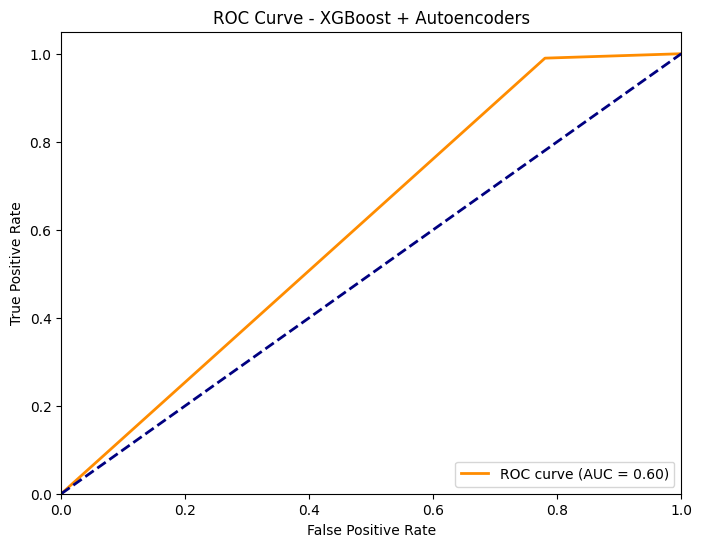

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve for the combined model
fpr, tpr, _ = roc_curve(y_test, y_pred_classifier)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost + Autoencoders')
plt.legend(loc='lower right')
plt.show()



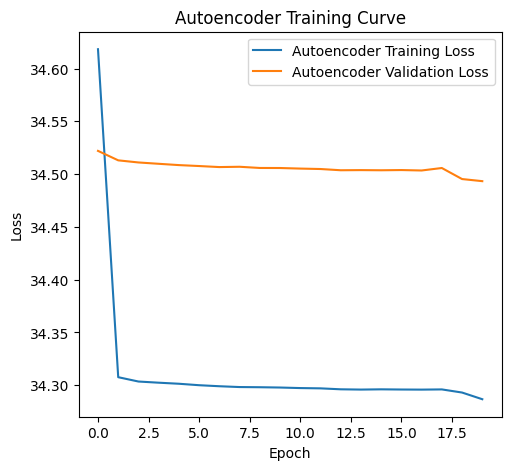

In [ ]:
# Access training history for the autoencoder and classifier
autoencoder_history = autoencoder.history.history
classifier_history = classifier.history.history

# Plot the training curve for the autoencoder
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(autoencoder_history['loss'], label='Autoencoder Training Loss')
plt.plot(autoencoder_history['val_loss'], label='Autoencoder Validation Loss')
plt.title('Autoencoder Training Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()






CAPSULE NETWORK

In [102]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv1D, Flatten, Dense, Reshape, Lambda
from tensorflow.keras import backend as K


# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize your data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform (X_test)

# Define the Capsule Network architecture
input_dim = X_train.shape[1]

# Primary Capsules
x = Input(shape=(input_dim,))
x_reshaped = Reshape(target_shape=(input_dim, 1))(x)
primary_capsules = Conv1D(filters=32, kernel_size=3)(x_reshaped)

# Digit Capsules
def squash(vectors, axis=-2):
    s_squared_norm = K.sum(K.square(vectors), axis, keepdims=True)
    scale = s_squared_norm / (1 + s_squared_norm) / K.sqrt(s_squared_norm + K.epsilon())
    return scale * vectors

digit_capsules = Lambda(squash)(primary_capsules)

# Class Capsules
num_classes = 1  # Binary classification
class_capsules = Conv1D(filters=num_classes, kernel_size=input_dim - 2)(digit_capsules)
class_capsules_reshaped = Reshape(target_shape=(num_classes,))(class_capsules)

# Define the Capsule Network model
capsule_model = keras.models.Model(x, class_capsules_reshaped)

# Compile the model
capsule_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Capsule Network
capsule_model.fit(X_train, y_train, epochs=10, batch_size=64)

# Evaluate the model on the test data
accuracy = capsule_model.evaluate(X_test, y_test)
print(f' Capsule Network Accuracy: {accuracy[1]}')




Epoch 1/10
288/288 [==============================] - 3s 4ms/step - loss: 2.1320 - accuracy: 0.1473
Epoch 2/10
288/288 [==============================] - 1s 3ms/step - loss: 0.3837 - accuracy: 0.9014
Epoch 3/10
288/288 [==============================] - 1s 2ms/step - loss: 0.3126 - accuracy: 0.9267
Epoch 4/10
288/288 [==============================] - 1s 2ms/step - loss: 0.3035 - accuracy: 0.9267
Epoch 5/10
288/288 [==============================] - 1s 2ms/step - loss: 0.3712 - accuracy: 0.9152
Epoch 6/10
288/288 [==============================] - 1s 2ms/step - loss: 0.2856 - accuracy: 0.9262
Epoch 7/10
288/288 [==============================] - 1s 2ms/step - loss: 0.2800 - accuracy: 0.9267
Epoch 8/10
288/288 [==============================] - 1s 3ms/step - loss: 0.2764 - accuracy: 0.9267
Epoch 9/10
288/288 [==============================] - 1s 2ms/step - loss: 0.3038 - accuracy: 0.9266
Epoch 10/10
144/144 [==============================] - 0s 2ms/step - loss: 0.4412 - accuracy: 0.8867

In [103]:
# Evaluate the model on the test data
y_pred = capsule_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate precision, recall, F1 score, and accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Accuracy: {accuracy}')


# Predict on the test set
y_pred_capsule = capsule_model.predict(X_test)

# Assuming y_test and y_pred_capsule are your actual and predicted values for the test set
mse_capsule = mean_squared_error(y_test, y_pred_capsule)
print(f'Capsule Network Mean Squared Error: {mse_capsule}')



144/144 [==============================] - 0s 1ms/step
Precision: 0.9410244360902256
Recall: 0.9368421052631579
F1 Score: 0.9389286132926972
Accuracy: 0.8866898651587647
144/144 [==============================] - 0s 1ms/step
Capsule Network Mean Squared Error: 0.10931899949676972


In [ ]:
# Calculate feature importance using a RandomForest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
feature_importance = rf_model.feature_importances_
print('Feature Importance:')
print(feature_importance)

Feature Importance:
[0.11032777 0.0874635  0.10481622 0.09741357 0.11052913 0.11201154
 0.11819898 0.09890316 0.07161077 0.08872535]


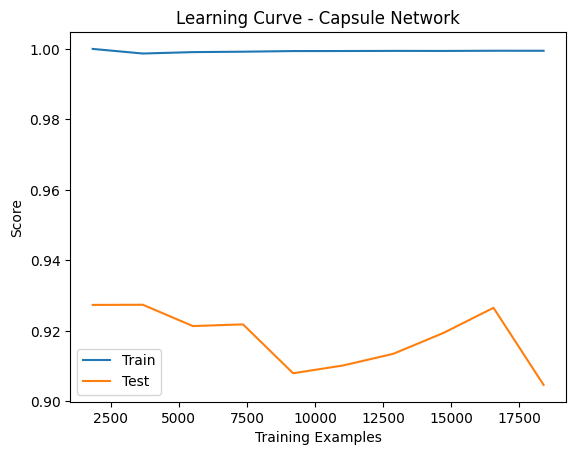

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(clf, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve - Capsule Network')
plt.legend()
plt.show()


Epoch 1/10
  1/288 [..............................] - ETA: 2s - loss: 0.2895 - accuracy: 0.8906

288/288 [==============================] - 1s 4ms/step - loss: 0.3099 - accuracy: 0.9263 - val_loss: 0.2728 - val_accuracy: 0.9291
Epoch 2/10
288/288 [==============================] - 1s 5ms/step - loss: 0.3811 - accuracy: 0.9166 - val_loss: 0.3221 - val_accuracy: 0.9293
Epoch 3/10
288/288 [==============================] - 1s 4ms/step - loss: 0.4369 - accuracy: 0.8891 - val_loss: 0.4110 - val_accuracy: 0.9204
Epoch 4/10
288/288 [==============================] - 1s 5ms/step - loss: 0.3498 - accuracy: 0.9260 - val_loss: 0.3124 - val_accuracy: 0.9302
Epoch 5/10
288/288 [==============================] - 1s 5ms/step - loss: 0.3902 - accuracy: 0.9077 - val_loss: 0.3693 - val_accuracy: 0.9293
Epoch 6/10
288/288 [==============================] - 1s 4ms/step - loss: 0.3229 - accuracy: 0.9257 - val_loss: 0.2983 - val_accuracy: 0.9298
Epoch 7/10
288/288 [==============================] - 1s 4ms/step - loss: 0.2787 - accuracy: 0.9267 - val_loss: 0.2574 - val_accuracy: 0.9298
Epoch 8/10
288/28

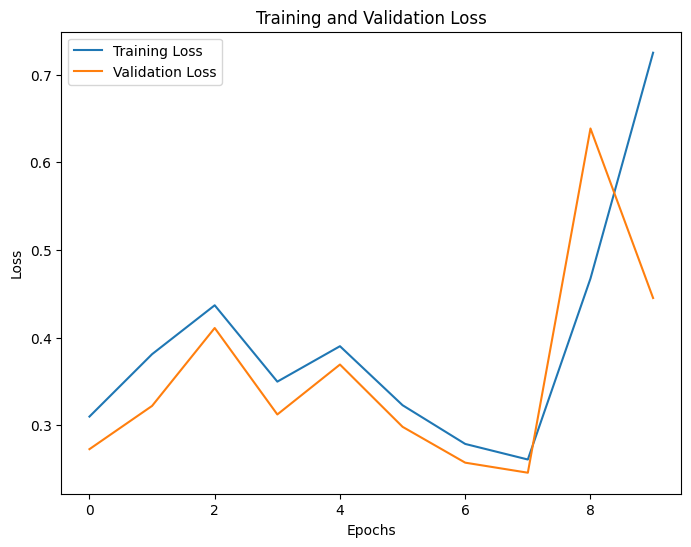

In [ ]:
import matplotlib.pyplot as plt

# Train the Capsule Network
history = capsule_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Plot the training loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


144/144 [==============================] - 0s 2ms/step


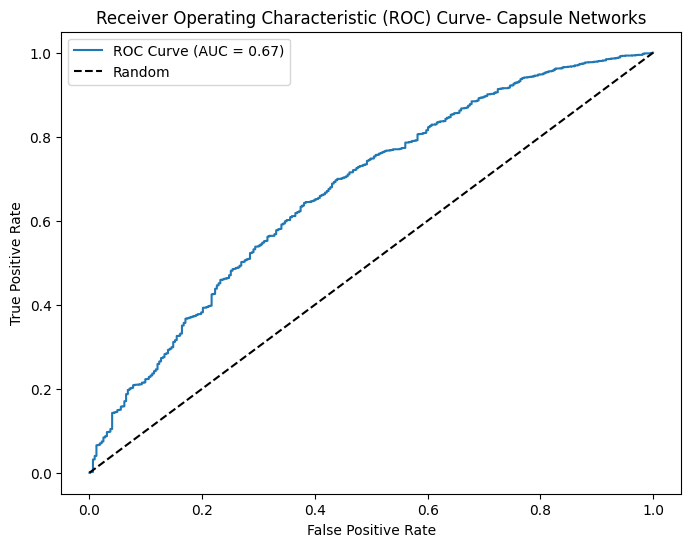

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test contains true labels and y_pred_prob contains predicted probabilities

# Generate predicted probabilities for ROC curve
y_pred_prob = capsule_model.predict(X_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve- Capsule Networks')
plt.legend()
plt.show()


CNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv1D, Flatten, Dense
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt


In [104]:


# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize your data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Convolutional Neural Network architecture
input_dim = X_train.shape[1]

model = keras.Sequential()
model.add(Input(shape=(input_dim, 1)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define a callback for ROC AUC calculation
class ROCCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.aucs = []

    def on_epoch_end(self, epoch, logs={}):
        if self.validation_data is None:
            return

        X_val, y_val = self.validation_data[0], self.validation_data[1]
        y_pred = self.model.predict(X_val)
        auc = roc_auc_score(y_val, y_pred)
        self.aucs.append(auc)
        print(f'Epoch {epoch + 1} - AUC: {auc:.4f}')

roc_callback = ROCCallback()

# Train the CNN model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks=[roc_callback])

# Evaluate the model on the test data
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f' CNN Testing Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Predict on the test set
y_pred_cnn = model.predict(X_test)

# Assuming y_test and y_pred_cnn are your actual and predicted values for the test set
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
print(f'CNN Mean Squared Error: {mse_cnn}')


Epoch 1/10
288/288 [==============================] - 2s 4ms/step - loss: 0.2576 - accuracy: 0.9269 - val_loss: 0.2308 - val_accuracy: 0.9311
Epoch 2/10
288/288 [==============================] - 1s 2ms/step - loss: 0.2322 - accuracy: 0.9291 - val_loss: 0.2224 - val_accuracy: 0.9332
Epoch 3/10
288/288 [==============================] - 1s 2ms/step - loss: 0.2269 - accuracy: 0.9300 - val_loss: 0.2204 - val_accuracy: 0.9356
Epoch 4/10
288/288 [==============================] - 1s 2ms/step - loss: 0.2241 - accuracy: 0.9315 - val_loss: 0.2197 - val_accuracy: 0.9354
Epoch 5/10
288/288 [==============================] - 1s 2ms/step - loss: 0.2214 - accuracy: 0.9317 - val_loss: 0.2180 - val_accuracy: 0.9358
Epoch 6/10
288/288 [==============================] - 1s 2ms/step - loss: 0.2190 - accuracy: 0.9317 - val_loss: 0.2177 - val_accuracy: 0.9356
Epoch 7/10
288/288 [==============================] - 1s 2ms/step - loss: 0.2182 - accuracy: 0.9316 - val_loss: 0.2180 - val_accuracy: 0.9345
Epoch 

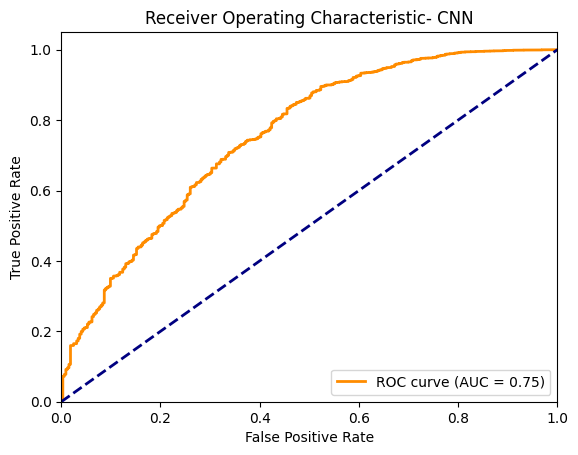

In [ ]:

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic- CNN')
plt.legend(loc='lower right')
plt.show()

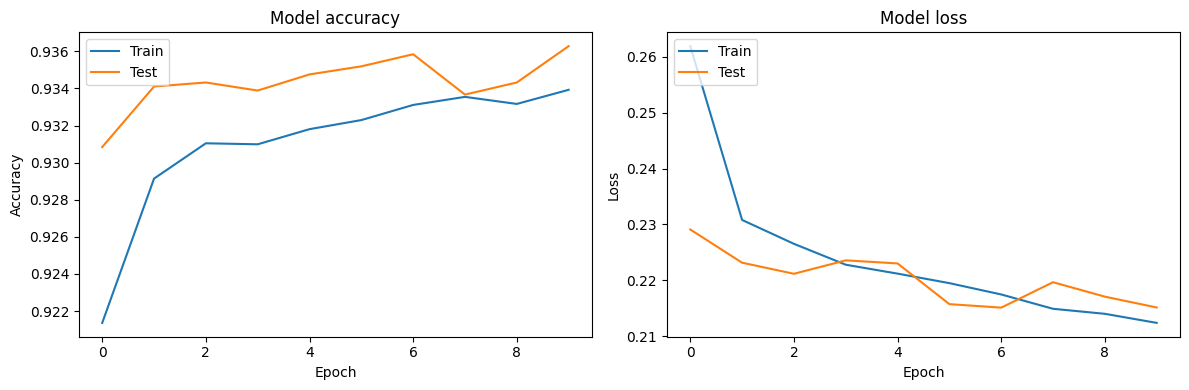

In [ ]:
# Train the CNN model and record the history
#history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Plot the learning curve
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()



GCN : To estimate SELFIES column


In [ ]:
import networkx as nx
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load drug features from 'node_features.csv'
node_features_df = pd.read_csv('node_features.csv', header=None) 
drug_features = {}
for row in node_features_df.iterrows():
    drug_id = row[0]
    features = np.array(row[1])
    drug_features[drug_id] = features

# Load interactions from 'DDi.csv'
interactions_df = pd.read_csv('DDI.csv')
interactions = list(zip(interactions_df['source'], interactions_df['target']))

# ...

# ...

# Create a NetworkX graph
G = nx.Graph()
for drug_id, features in drug_features.items():
    G.add_node(drug_id, features=features)  # Set the 'features' attribute for each node
for drug_id1, drug_id2 in interactions:
    G.add_edge(drug_id1, drug_id2)

# Extract features and labels
node_features = np.array([G.nodes[n]['features'] for n in G.nodes() if 'features' in G.nodes[n]])

# Construct the adjacency matrix
adjacency_matrix = nx.linalg.graphmatrix.adjacency_matrix(G)

edges = np.array(list(G.edges()))

# Check for the presence of edges in interactions to determine labels
labels = [1 if any(np.array_equal(edge, inter) for inter in interactions) else 0 for edge in edges]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(edges, labels, test_size=0.2, random_state=42)

# ...

# Define a graph convolutional network (GCN) model using TensorFlow/Keras
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(len(node_features[0]),)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.GraphConvolution(16, activation='relu')([X_train, adjacency_matrix]),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(node_features, y_train, epochs=100, batch_size=64, validation_data=(node_features, y_test), verbose=2)

# Evaluate the model
y_pred = model.predict(node_features)
y_pred_binary = (y_pred > 0.5).astype(int)
test_accuracy = accuracy_score(y_test, y_pred_binary)
print("Test Accuracy:", test_accuracy)

KeyboardInterrupt: 